# Import necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Data Cleaning and Preprocessing

In [ ]:
# Load the data
data = pd.read_csv('Dataset_ecommerce.csv') #parse_dates= ['InvoiceDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Convert column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.isna().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,135080
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [ ]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [ ]:
data['CustomerID'] = data['CustomerID'].astype(int).astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
num_customers = data['CustomerID'].nunique()
num_transanctions = data['InvoiceNo'].nunique()
num_products = data['StockCode'].nunique()


In [ ]:
print(f'Number of customers: {num_customers}')
print (f'Number of transactions: {num_transanctions}')
print (f'Number of products: {num_products}')

Number of customers: 4372
Number of transactions: 22190
Number of products: 9000


In [ ]:
date_range = data['InvoiceDate'].min(), data['InvoiceDate'].max()
print(f'Transaction Period: {date_range}')

Transaction Period: (Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))


In [ ]:
negative_values = data[data['Quantity'] < 0]

if not negative_values.empty:
    print("There are negative values in 'Quantity':")
    print(negative_values)
else:
    print("No negative values in 'Quantity'.")

No negative values in 'Quantity'.


In [ ]:
num_countries = data['Country'].nunique()
print("Total number of countries:", num_countries)


Total number of countries: 28


In [ ]:
# Total number of unique countries
num_countries = data['Country'].nunique()
print("Total number of countries:", num_countries)

# List of unique countries
country_list = data['Country'].unique()
print("List of countries:", country_list)


Total number of countries: 28
List of countries: ['Egypt' 'Mali' 'South Africa' 'Rwanda' 'Sierra Leone' 'Benin'
 'Burkina Faso' 'Nigeria' "Cote d'Ivoire" 'Somalia' 'Cameroon' 'Tanzania'
 'Sudan' 'Madagascar' 'Tunisia' 'Mozambique' 'Zimbabwe' 'Uganda' 'Libya'
 'Morocco' 'Ethiopia' 'Algeria' 'Ghana' 'Niger' 'Togo' 'Kenya' 'Zambia'
 'Senegal']


In [ ]:
country_list_sorted = sorted(data['Country'].unique())
print("Countries (sorted):", country_list_sorted)


Countries (sorted): ['Algeria', 'Benin', 'Burkina Faso', 'Cameroon', "Cote d'Ivoire", 'Egypt', 'Ethiopia', 'Ghana', 'Kenya', 'Libya', 'Madagascar', 'Mali', 'Morocco', 'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']


In [ ]:
top_countries = (
    data.groupby("Country")["CustomerID"]
      .nunique()   # count unique customers
      .sort_values(ascending=False)
)

print(top_countries.head(10))

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Sierra Leone    3046
Mali            3044
Algeria         3043
Senegal         3040
Niger           3039
Name: CustomerID, dtype: int64


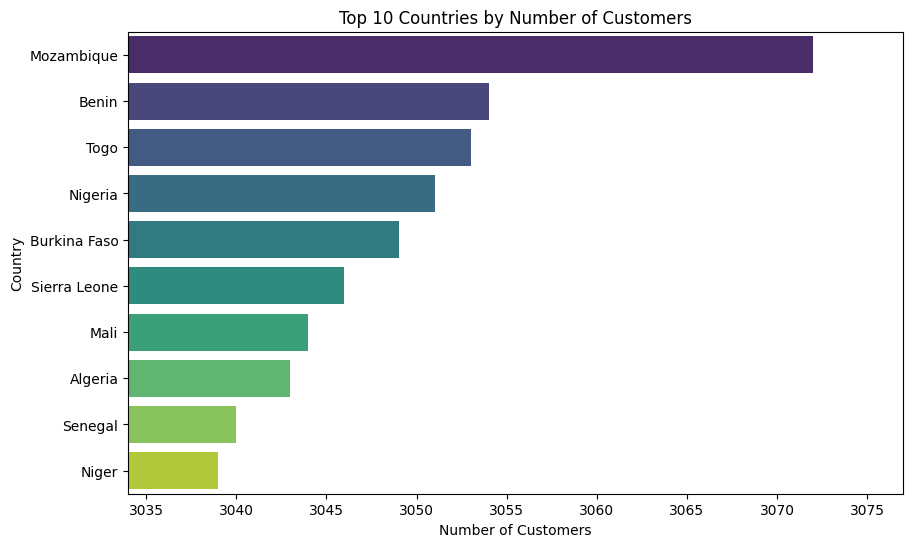

In [ ]:
top10 = top_countries.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, hue=top10.index,
            palette="viridis", legend=False)

plt.xlim(top10.min() - 5, top10.max() + 5)
plt.title("Top 10 Countries by Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.show()


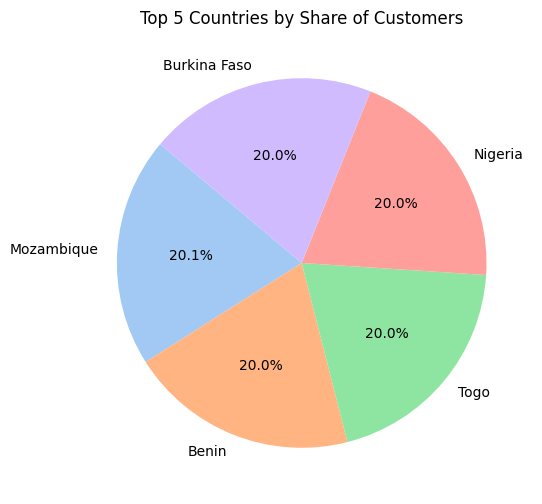

In [ ]:
top5 = top_countries.head(5)

plt.figure(figsize=(6,6))
plt.pie(
    top5.values,
    labels=top5.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Top 5 Countries by Share of Customers")
plt.show()

In [ ]:
data['InvoiceMonth']= data['InvoiceDate'].dt.to_period('M')

In [ ]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [ ]:
monthly_revenue = data.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [ ]:
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)

In [ ]:
monthly_revenue

,InvoiceMonth,Revenue
0,2010-12,6.792367e+07
1,2011-01,5.582933e+07
2,2011-02,5.208536e+07
3,2011-03,7.137210e+07
4,2011-04,5.914003e+07
5,2011-05,7.434151e+07
6,2011-06,7.109639e+07
7,2011-07,7.040789e+07
8,2011-08,6.994326e+07
9,2011-09,1.036281e+08


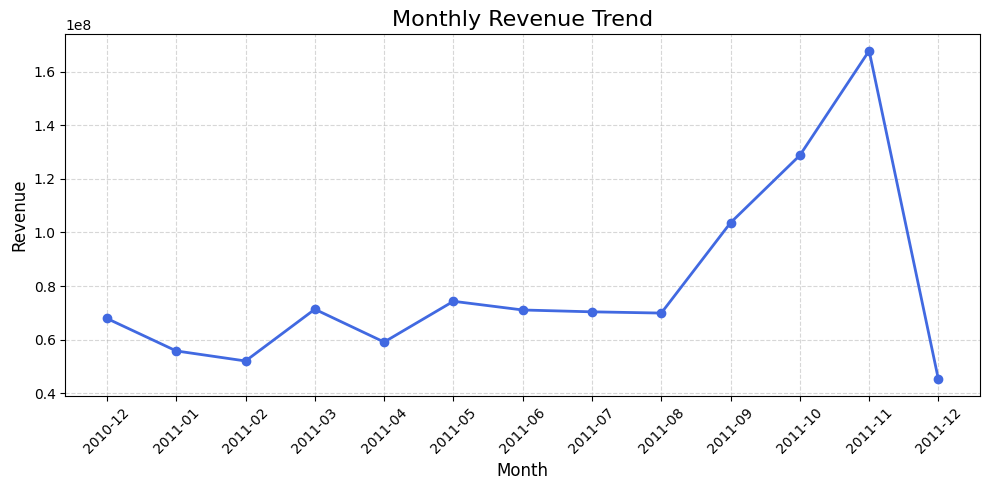

In [ ]:
# Plot monthly revenue as a line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['InvoiceMonth'], monthly_revenue['Revenue'], marker='o', color='royalblue', linewidth=2)

# Add title and axis labels
plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=45)

# Optional: Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



#Cohort Analysis

In [ ]:
#cohort_data = data.groupby(['CustomerID', 'InvoiceMonth']).agg({'Revenue': 'sum'}).reset_index()

In [ ]:
cohort_data = data.groupby('CustomerID')['InvoiceMonth'].min()

In [ ]:
cohort_data.name = 'cohort_Month'

In [ ]:
cohort_data

,cohort_Month
CustomerID,
12346,2011-01
12347,2010-12
12348,2010-12
12349,2011-11
12350,2011-02
...,...
18280,2011-03
18281,2011-06
18282,2011-08


In [ ]:
data = data.merge(cohort_data, on='CustomerID')

In [ ]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,cohort_Month
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,2011-12,913.25,2011-08
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,2011-12,8521.10,2011-08
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,2011-12,560.98,2011-08
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-12,3592.35,2011-08


In [ ]:
Invoice_year , Invoice_month = data['InvoiceDate'].dt.year , data['InvoiceDate'].dt.month
cohort_year , cohort_month = data['cohort_Month'].dt.year , data['cohort_Month'].dt.month

In [ ]:
year_diff = Invoice_year - cohort_year
month_diff = Invoice_month - cohort_month

In [ ]:
data['CohortIndex'] = year_diff * 12 + month_diff + 1

In [ ]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,cohort_Month,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,2011-12,913.25,2011-08,5
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,2011-12,8521.10,2011-08,5
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,2011-12,560.98,2011-08,5
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-12,3592.35,2011-08,5


#Cohort Pivot Table

In [ ]:
cohort_counts = data.groupby(['cohort_Month', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [ ]:
cohort_pivot = cohort_counts.pivot_table(index='cohort_Month', columns='CohortIndex', values='CustomerID')

In [ ]:
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_Month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Retention Rates

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0)

In [ ]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_Month,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


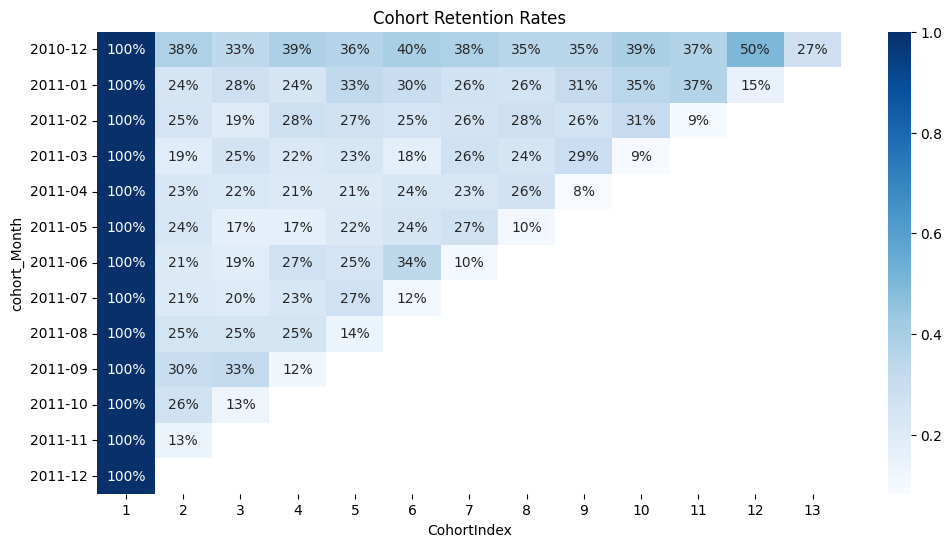

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap="Blues")
plt.title("Cohort Retention Rates")
plt.show()

## Segmentation Analysis (RFM)

In [ ]:
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [ ]:
reference_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'
}).reset_index()

In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,5342.40
1,12347,2,182,431501.00
2,12348,75,31,82378.47
3,12349,19,73,176075.12
4,12350,310,17,48173.37


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,93.053294,2.372909e+05
std,100.765435,232.471608,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,17.000000,4.350893e+04
50%,50.000000,42.000000,1.066925e+05
75%,143.000000,102.000000,2.599154e+05
max,374.000000,7983.000000,2.038383e+07


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X_scaled = ss.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [ ]:
X_scaled

array([[ 2.32202285, -0.3917197 , -0.39022789],
       [-0.89373323,  0.38265697,  0.32673724],
       [-0.1691956 , -0.26695902, -0.26062315],
       ...,
       [-0.83418219, -0.34439668, -0.33863177],
       [-0.87388289,  2.85205812,  2.98028181],
       [-0.48680114, -0.0991774 , -0.04750002]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
inertia = []
s_score = []
for i in range(2,12):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

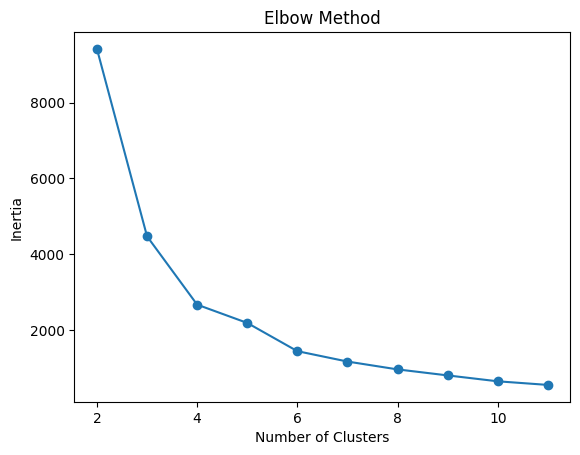

In [ ]:
plt.plot(range(2,12), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Silhouette Scores: {2: np.float64(0.5632131391866987), 3: np.float64(0.5799174085950378), 4: np.float64(0.6146153596795741), 5: np.float64(0.5019546448558148), 6: np.float64(0.5314594544494666), 7: np.float64(0.4949380136238797), 8: np.float64(0.49242095706087424), 9: np.float64(0.44508907925863167), 10: np.float64(0.4437264734581149), 11: np.float64(0.43396136125409696)}


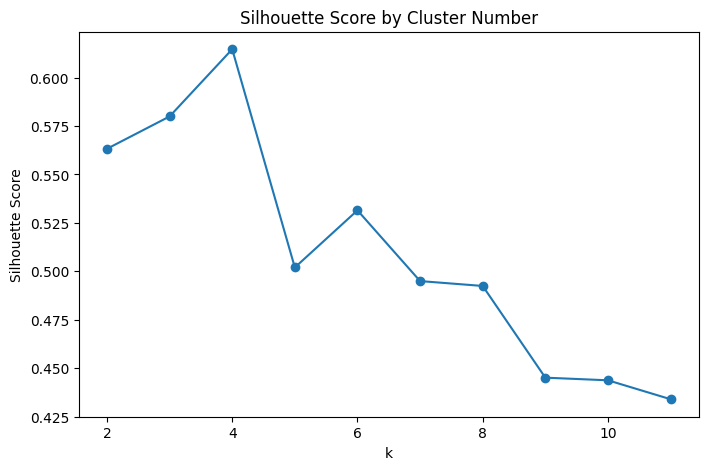

In [ ]:
# Method 2: Silhouette Score
sil_scores = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

print("Silhouette Scores:", sil_scores)

plt.figure(figsize=(8,5))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title('Silhouette Score by Cluster Number')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

Calinski-Harabasz Scores: {2: np.float64(1720.0578852585736), 3: np.float64(4215.785582990893), 4: np.float64(5674.653028998661), 5: np.float64(5426.478829767867), 6: np.float64(7007.136861151442), 7: np.float64(7359.27820287411), 8: np.float64(7779.2494102328355), 9: np.float64(8232.037576826862), 10: np.float64(9151.31107159361), 11: np.float64(9696.401568224894)}


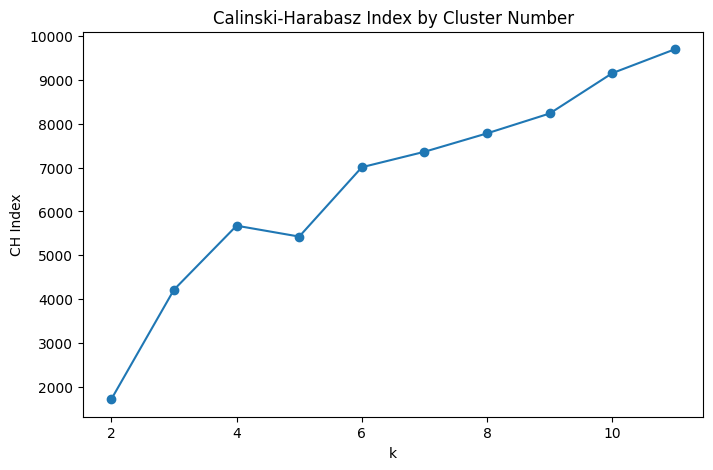

In [ ]:
# Method 3: Calinski-Harabasz Index
ch_scores = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ch = calinski_harabasz_score(X_scaled, labels)
    ch_scores[k] = ch

print("Calinski-Harabasz Scores:", ch_scores)

plt.figure(figsize=(8,5))
plt.plot(list(ch_scores.keys()), list(ch_scores.values()), marker='o')
plt.title('Calinski-Harabasz Index by Cluster Number')
plt.xlabel('k')
plt.ylabel('CH Index')
plt.show()

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

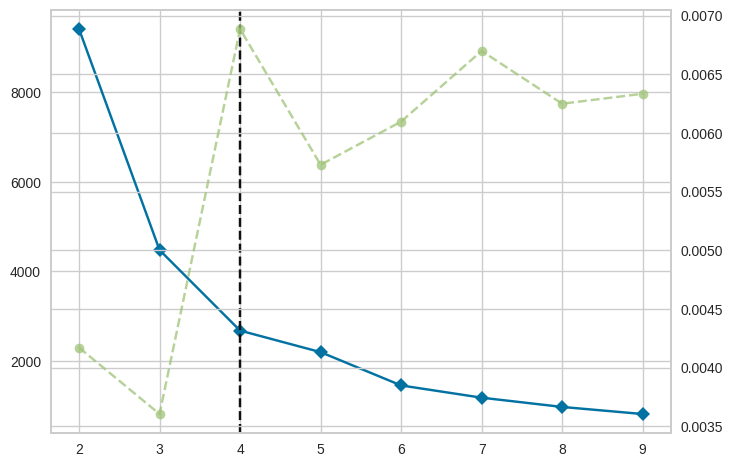

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)

In [ ]:
from typing_extensions import final
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
rfm['Cluster']= final_model.labels_

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,326,2,5342.40,1
1,12347,2,182,431501.00,3
2,12348,75,31,82378.47,3
3,12349,19,73,176075.12,3
4,12350,310,17,48173.37,1


In [ ]:
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns= {'CustomerID': 'NumCustomers'}).round(1)

In [ ]:
cluster_profile

,Recency,Frequency,Monetary,NumCustomers
Cluster,,,,
0,14.4,521.4,1327427.5,252
1,249.3,27.4,69606.7,1075
2,2.0,5914.0,15156121.0,4
3,43.0,73.1,186607.1,3041


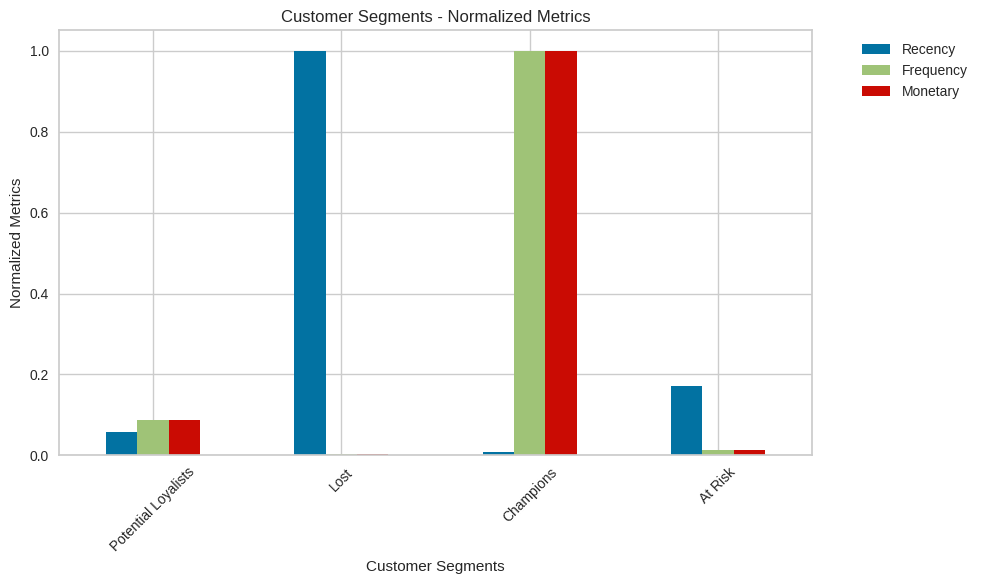

In [ ]:
cluster_name = {
    0: 'Potential Loyalists',
    1: 'Lost',
    2: 'Champions',
    3: 'At Risk'
}

cluster_profile['Segment'] = cluster_profile.index.map(cluster_name)

data_plot = cluster_profile.copy()
data_plot[['recency', 'frequency', 'monetary']] = (data_plot[['Recency', 'Frequency', 'Monetary']].apply(lambda x: x / x.max())
)

data_plot.set_index('Segment')[['recency', 'frequency', 'monetary']].plot(kind='bar', stacked=False, figsize=(10,6))

plt.title('Customer Segments - Normalized Metrics')
plt.xlabel('Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Normalized Metrics')
plt.legend(['Recency', 'Frequency', 'Monetary'],bbox_to_anchor=(1.05,1), loc= 'upper left')
plt.tight_layout()
plt.show()




In [ ]:
Champions = rfm[rfm['Cluster'] == 2].copy()
Champions

,CustomerID,Recency,Frequency,Monetary,Cluster
330,12748,1,4642,11912482.34,2
1300,14096,4,5128,12965429.74,2
1895,14911,1,5903,15362741.47,2
4042,17841,2,7983,20383830.65,2


In [ ]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,cohort_Month,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,2011-12,913.25,2011-08,5
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,2011-12,8521.10,2011-08,5
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,2011-12,560.98,2011-08,5
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-12,3592.35,2011-08,5


In [ ]:
# 1) Create the cohort lookup (from cohort analysis table)
customer_cohort = data[['CustomerID', 'cohort_Month']].drop_duplicates()

In [ ]:
# 2) Filter the RFM table to just cluster 2, then merge in CohortMonth
Champions = (
    rfm.loc[rfm['Cluster'] == 2, ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']]
      .rename(columns={'Recency':'recency_days', 'Frequency':'frequency', 'Monetary':'monetary'})
)

cluster2_customers = Champions.merge(customer_cohort, on='CustomerID', how='left')
cluster2_customers

,CustomerID,recency_days,frequency,monetary,Cluster,cohort_Month
0,12748,1,4642,11912482.34,2,2010-12
1,14096,4,5128,12965429.74,2,2011-08
2,14911,1,5903,15362741.47,2,2010-12
3,17841,2,7983,20383830.65,2,2010-12


In [ ]:
# ---- Cluster 0: Potential Loyalists ----
Potential_Loyalists = (
    rfm.loc[rfm['Cluster'] == 0, ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']]
       .rename(columns={'Recency':'recency_days', 'Frequency':'frequency', 'Monetary':'monetary'})
)
cluster0_customers = Potential_Loyalists.merge(customer_cohort, on='CustomerID', how='left')
cluster0_customers

,CustomerID,recency_days,frequency,monetary,Cluster,cohort_Month
0,12415,24,778,1944187.00,0,2011-01
1,12428,26,300,780310.63,0,2011-03
2,12433,1,420,1041010.62,0,2010-12
3,12451,11,355,817653.44,0,2011-01
4,12471,2,531,1351390.04,0,2010-12
...,...,...,...,...,...,...
247,18116,68,378,971166.68,0,2010-12
248,18118,11,1284,3319927.44,0,2010-12
249,18122,8,364,920006.33,0,2011-07
250,18223,2,299,770695.42,0,2010-12


In [ ]:
# ---- Cluster 1: Lost ----
Lost = (
    rfm.loc[rfm['Cluster'] == 1, ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']]
       .rename(columns={'Recency':'recency_days', 'Frequency':'frequency', 'Monetary':'monetary'})
)
cluster1_customers = Lost.merge(customer_cohort, on='CustomerID', how='left')
cluster1_customers

,CustomerID,recency_days,frequency,monetary,Cluster,cohort_Month
0,12346,326,2,5342.40,1,2011-01
1,12350,310,17,48173.37,1,2011-02
2,12353,204,4,4357.89,1,2011-05
3,12354,232,58,161522.49,1,2011-04
4,12355,214,13,37648.28,1,2011-05
...,...,...,...,...,...,...
1070,18256,355,4,3317.66,1,2010-12
1071,18260,173,140,349885.06,1,2010-12
1072,18269,358,8,18542.07,1,2010-12
1073,18280,278,10,18907.36,1,2011-03


In [ ]:
# ---- Cluster 3: At Risk ----
At_Risk = (
    rfm.loc[rfm['Cluster'] == 3, ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']]
       .rename(columns={'Recency':'recency_days', 'Frequency':'frequency', 'Monetary':'monetary'})
)
cluster3_customers = At_Risk.merge(customer_cohort, on='CustomerID', how='left')
cluster3_customers

,CustomerID,recency_days,frequency,monetary,Cluster,cohort_Month
0,12347,2,182,431501.00,3,2010-12
1,12348,75,31,82378.47,3,2010-12
2,12349,19,73,176075.12,3,2011-11
3,12352,36,95,241567.46,3,2011-02
4,12356,23,59,161617.98,3,2011-01
...,...,...,...,...,...,...
3036,18276,21,16,36314.43,3,2011-10
3037,18277,58,9,23298.35,3,2011-01
3038,18278,74,9,21841.57,3,2011-09
3039,18282,8,13,36010.74,3,2011-08
